In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='4'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import sys

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['treatment']=0
df_test['outcome']=0
df=pd.concat([df_train,df_test])
df.index=np.arange(len(df))

In [3]:
for i in df.columns:
    s=df[i]
    if len(s.unique())<10:
        #处理离散变量
        s=np.array(pd.get_dummies(s)).argmax(-1)
        df[i]=s
    else:
        #对于连续变量的缺省值使用均值填充
        df[i]=df[i].fillna(df[i].mean())

In [4]:
'''
用WQ表示W集合与Q集合的并集。
WQ与C被(treatment,outcome)d分离。利用这个特性可以将WQ与C分离出来。
具体方案为：
如果假设x、y是待考察的字段，如果在（treatment,outcome）的基础上，
加上x能提升y预测的性能，则认为x与y属于同一集合（WQ或C）。
'''

L=list()
for col in df.columns[:-2]:
    y_col=['V_16']
    x_col_list=[col]+['treatment','outcome']
    D_train=xgboost.DMatrix(df.loc[:30000,x_col_list],df.loc[:30000,y_col])
    D_test=xgboost.DMatrix(df.loc[30000:len(df_train),x_col_list],df.loc[30000:len(df_train),y_col])
    result_dict=dict()
    model=xgboost.train(
        params={
            'objective':'reg:squarederror',
            'eval_metric':'rmse',
            'eta':0.1,
            'alpha':0.1,
            'lambda':0.1,
            'seed':np.random.randint(0,100000),
            'colsample_bytree':0.7,
            'gpu_id':0, 
            'tree_method':'gpu_hist',
        },
        dtrain=D_train,
        num_boost_round=100,
        evals=[(D_train,'train'),(D_test,'test')],
        evals_result=result_dict
    )
    score=min(result_dict['test']['rmse'])
    print(col,score)
    L.append((col,score))

[0]	train-rmse:0.528384	test-rmse:0.533238
[1]	train-rmse:0.499843	test-rmse:0.505384
[2]	train-rmse:0.476064	test-rmse:0.482076
[3]	train-rmse:0.455235	test-rmse:0.461842
[4]	train-rmse:0.437574	test-rmse:0.444757
[5]	train-rmse:0.422289	test-rmse:0.42985
[6]	train-rmse:0.409774	test-rmse:0.417959
[7]	train-rmse:0.399218	test-rmse:0.408057
[8]	train-rmse:0.39016	test-rmse:0.399276
[9]	train-rmse:0.38318	test-rmse:0.392623
[10]	train-rmse:0.377089	test-rmse:0.387116
[11]	train-rmse:0.372334	test-rmse:0.382635
[12]	train-rmse:0.368133	test-rmse:0.378989
[13]	train-rmse:0.364518	test-rmse:0.375992
[14]	train-rmse:0.361497	test-rmse:0.373487
[15]	train-rmse:0.358747	test-rmse:0.37099
[16]	train-rmse:0.356621	test-rmse:0.369379
[17]	train-rmse:0.355126	test-rmse:0.368093
[18]	train-rmse:0.353455	test-rmse:0.366659
[19]	train-rmse:0.35207	test-rmse:0.365481
[20]	train-rmse:0.350942	test-rmse:0.364498
[21]	train-rmse:0.350042	test-rmse:0.364334
[22]	train-rmse:0.349229	test-rmse:0.363659
[23

[88]	train-rmse:0.340771	test-rmse:0.361391
[89]	train-rmse:0.340554	test-rmse:0.361454
[90]	train-rmse:0.340363	test-rmse:0.36153
[91]	train-rmse:0.34032	test-rmse:0.361529
[92]	train-rmse:0.340286	test-rmse:0.361532
[93]	train-rmse:0.340277	test-rmse:0.361538
[94]	train-rmse:0.34026	test-rmse:0.361533
[95]	train-rmse:0.340125	test-rmse:0.361555
[96]	train-rmse:0.339798	test-rmse:0.361469
[97]	train-rmse:0.339773	test-rmse:0.361475
[98]	train-rmse:0.339766	test-rmse:0.361482
[99]	train-rmse:0.339479	test-rmse:0.361478
V_1 0.360497
[0]	train-rmse:0.528226	test-rmse:0.532915
[1]	train-rmse:0.499412	test-rmse:0.504462
[2]	train-rmse:0.475441	test-rmse:0.480887
[3]	train-rmse:0.455097	test-rmse:0.460911
[4]	train-rmse:0.437925	test-rmse:0.444058
[5]	train-rmse:0.422825	test-rmse:0.429291
[6]	train-rmse:0.410182	test-rmse:0.416971
[7]	train-rmse:0.399395	test-rmse:0.406424
[8]	train-rmse:0.390612	test-rmse:0.397896
[9]	train-rmse:0.383132	test-rmse:0.39058
[10]	train-rmse:0.376966	test-rms

[76]	train-rmse:0.340973	test-rmse:0.35995
[77]	train-rmse:0.340955	test-rmse:0.359959
[78]	train-rmse:0.340943	test-rmse:0.359971
[79]	train-rmse:0.340858	test-rmse:0.359914
[80]	train-rmse:0.340793	test-rmse:0.359921
[81]	train-rmse:0.340782	test-rmse:0.359921
[82]	train-rmse:0.340554	test-rmse:0.360116
[83]	train-rmse:0.340533	test-rmse:0.360144
[84]	train-rmse:0.3405	test-rmse:0.360173
[85]	train-rmse:0.340462	test-rmse:0.360169
[86]	train-rmse:0.340303	test-rmse:0.360274
[87]	train-rmse:0.340286	test-rmse:0.360301
[88]	train-rmse:0.34015	test-rmse:0.360341
[89]	train-rmse:0.340121	test-rmse:0.360357
[90]	train-rmse:0.340115	test-rmse:0.360361
[91]	train-rmse:0.340074	test-rmse:0.360335
[92]	train-rmse:0.339744	test-rmse:0.360278
[93]	train-rmse:0.339392	test-rmse:0.360342
[94]	train-rmse:0.339371	test-rmse:0.360325
[95]	train-rmse:0.339365	test-rmse:0.360324
[96]	train-rmse:0.339347	test-rmse:0.360346
[97]	train-rmse:0.339267	test-rmse:0.360309
[98]	train-rmse:0.339262	test-rmse:0

[63]	train-rmse:0.348086	test-rmse:0.359048
[64]	train-rmse:0.348085	test-rmse:0.359048
[65]	train-rmse:0.348085	test-rmse:0.359048
[66]	train-rmse:0.348048	test-rmse:0.359055
[67]	train-rmse:0.34792	test-rmse:0.35904
[68]	train-rmse:0.347908	test-rmse:0.359036
[69]	train-rmse:0.347907	test-rmse:0.359036
[70]	train-rmse:0.347799	test-rmse:0.359032
[71]	train-rmse:0.347798	test-rmse:0.359032
[72]	train-rmse:0.347798	test-rmse:0.359032
[73]	train-rmse:0.347723	test-rmse:0.35898
[74]	train-rmse:0.347723	test-rmse:0.35898
[75]	train-rmse:0.347681	test-rmse:0.358969
[76]	train-rmse:0.347538	test-rmse:0.359028
[77]	train-rmse:0.347515	test-rmse:0.359038
[78]	train-rmse:0.347498	test-rmse:0.359027
[79]	train-rmse:0.347498	test-rmse:0.359027
[80]	train-rmse:0.347498	test-rmse:0.359027
[81]	train-rmse:0.347498	test-rmse:0.359026
[82]	train-rmse:0.347497	test-rmse:0.359026
[83]	train-rmse:0.347393	test-rmse:0.358971
[84]	train-rmse:0.347337	test-rmse:0.358942
[85]	train-rmse:0.347337	test-rmse:0

[51]	train-rmse:0.317085	test-rmse:0.330144
[52]	train-rmse:0.317034	test-rmse:0.330163
[53]	train-rmse:0.31625	test-rmse:0.330088
[54]	train-rmse:0.31622	test-rmse:0.330106
[55]	train-rmse:0.316199	test-rmse:0.330116
[56]	train-rmse:0.31599	test-rmse:0.329977
[57]	train-rmse:0.315819	test-rmse:0.329858
[58]	train-rmse:0.315683	test-rmse:0.329787
[59]	train-rmse:0.315215	test-rmse:0.329553
[60]	train-rmse:0.315082	test-rmse:0.329462
[61]	train-rmse:0.314352	test-rmse:0.329074
[62]	train-rmse:0.314296	test-rmse:0.329057
[63]	train-rmse:0.314159	test-rmse:0.329027
[64]	train-rmse:0.314122	test-rmse:0.32903
[65]	train-rmse:0.314049	test-rmse:0.329052
[66]	train-rmse:0.313593	test-rmse:0.328873
[67]	train-rmse:0.313465	test-rmse:0.328879
[68]	train-rmse:0.313419	test-rmse:0.328864
[69]	train-rmse:0.313397	test-rmse:0.328891
[70]	train-rmse:0.313026	test-rmse:0.328631
[71]	train-rmse:0.312906	test-rmse:0.328678
[72]	train-rmse:0.312886	test-rmse:0.328684
[73]	train-rmse:0.312792	test-rmse:0

[38]	train-rmse:0.281439	test-rmse:0.292508
[39]	train-rmse:0.281066	test-rmse:0.29231
[40]	train-rmse:0.28076	test-rmse:0.292148
[41]	train-rmse:0.280541	test-rmse:0.291986
[42]	train-rmse:0.280353	test-rmse:0.291851
[43]	train-rmse:0.280197	test-rmse:0.291749
[44]	train-rmse:0.280059	test-rmse:0.291677
[45]	train-rmse:0.279923	test-rmse:0.291575
[46]	train-rmse:0.279731	test-rmse:0.291421
[47]	train-rmse:0.279631	test-rmse:0.291365
[48]	train-rmse:0.279416	test-rmse:0.29129
[49]	train-rmse:0.279342	test-rmse:0.291242
[50]	train-rmse:0.279282	test-rmse:0.291204
[51]	train-rmse:0.279137	test-rmse:0.291142
[52]	train-rmse:0.279084	test-rmse:0.291125
[53]	train-rmse:0.278961	test-rmse:0.291056
[54]	train-rmse:0.278914	test-rmse:0.291047
[55]	train-rmse:0.278808	test-rmse:0.290984
[56]	train-rmse:0.278749	test-rmse:0.290922
[57]	train-rmse:0.278573	test-rmse:0.290961
[58]	train-rmse:0.27848	test-rmse:0.29091
[59]	train-rmse:0.278431	test-rmse:0.290855
[60]	train-rmse:0.27839	test-rmse:0.2

[26]	train-rmse:0.349235	test-rmse:0.360069
[27]	train-rmse:0.348612	test-rmse:0.359908
[28]	train-rmse:0.348427	test-rmse:0.35981
[29]	train-rmse:0.348279	test-rmse:0.359713
[30]	train-rmse:0.347987	test-rmse:0.359503
[31]	train-rmse:0.347855	test-rmse:0.359439
[32]	train-rmse:0.347439	test-rmse:0.359305
[33]	train-rmse:0.347352	test-rmse:0.359282
[34]	train-rmse:0.347162	test-rmse:0.359186
[35]	train-rmse:0.346842	test-rmse:0.359068
[36]	train-rmse:0.346682	test-rmse:0.358976
[37]	train-rmse:0.346598	test-rmse:0.359004
[38]	train-rmse:0.346567	test-rmse:0.359
[39]	train-rmse:0.346544	test-rmse:0.359003
[40]	train-rmse:0.346424	test-rmse:0.358951
[41]	train-rmse:0.346107	test-rmse:0.358871
[42]	train-rmse:0.345825	test-rmse:0.358838
[43]	train-rmse:0.345753	test-rmse:0.358812
[44]	train-rmse:0.345698	test-rmse:0.358809
[45]	train-rmse:0.345647	test-rmse:0.358823
[46]	train-rmse:0.345401	test-rmse:0.358902
[47]	train-rmse:0.345081	test-rmse:0.358753
[48]	train-rmse:0.345001	test-rmse:0

[13]	train-rmse:0.364983	test-rmse:0.373767
[14]	train-rmse:0.361983	test-rmse:0.371176
[15]	train-rmse:0.359559	test-rmse:0.369046
[16]	train-rmse:0.357494	test-rmse:0.367114
[17]	train-rmse:0.355769	test-rmse:0.365755
[18]	train-rmse:0.354301	test-rmse:0.364471
[19]	train-rmse:0.353081	test-rmse:0.363372
[20]	train-rmse:0.352023	test-rmse:0.36252
[21]	train-rmse:0.351323	test-rmse:0.361948
[22]	train-rmse:0.350756	test-rmse:0.361493
[23]	train-rmse:0.350142	test-rmse:0.360957
[24]	train-rmse:0.349562	test-rmse:0.360608
[25]	train-rmse:0.349247	test-rmse:0.360397
[26]	train-rmse:0.348588	test-rmse:0.360101
[27]	train-rmse:0.348373	test-rmse:0.359977
[28]	train-rmse:0.348034	test-rmse:0.359733
[29]	train-rmse:0.347757	test-rmse:0.359544
[30]	train-rmse:0.347527	test-rmse:0.359388
[31]	train-rmse:0.347337	test-rmse:0.359218
[32]	train-rmse:0.347184	test-rmse:0.359106
[33]	train-rmse:0.347046	test-rmse:0.359002
[34]	train-rmse:0.34697	test-rmse:0.359015
[35]	train-rmse:0.346568	test-rmse

V_14 0.358264
[0]	train-rmse:0.528143	test-rmse:0.532745
[1]	train-rmse:0.490107	test-rmse:0.495038
[2]	train-rmse:0.465014	test-rmse:0.470331
[3]	train-rmse:0.437859	test-rmse:0.443662
[4]	train-rmse:0.41456	test-rmse:0.420834
[5]	train-rmse:0.391639	test-rmse:0.398155
[6]	train-rmse:0.37462	test-rmse:0.381553
[7]	train-rmse:0.360245	test-rmse:0.367564
[8]	train-rmse:0.345356	test-rmse:0.352888
[9]	train-rmse:0.332798	test-rmse:0.340378
[10]	train-rmse:0.324217	test-rmse:0.332058
[11]	train-rmse:0.318279	test-rmse:0.326265
[12]	train-rmse:0.313369	test-rmse:0.321526
[13]	train-rmse:0.305927	test-rmse:0.314128
[14]	train-rmse:0.301406	test-rmse:0.309777
[15]	train-rmse:0.298537	test-rmse:0.307008
[16]	train-rmse:0.2962	test-rmse:0.304754
[17]	train-rmse:0.291617	test-rmse:0.30018
[18]	train-rmse:0.289988	test-rmse:0.298634
[19]	train-rmse:0.286459	test-rmse:0.295055
[20]	train-rmse:0.285293	test-rmse:0.294032
[21]	train-rmse:0.283665	test-rmse:0.292485
[22]	train-rmse:0.281196	test-rms

[88]	train-rmse:0.00269	test-rmse:0.002823
[89]	train-rmse:0.002677	test-rmse:0.00281
[90]	train-rmse:0.002661	test-rmse:0.002792
[91]	train-rmse:0.002653	test-rmse:0.002782
[92]	train-rmse:0.002645	test-rmse:0.002774
[93]	train-rmse:0.002639	test-rmse:0.002767
[94]	train-rmse:0.002628	test-rmse:0.002754
[95]	train-rmse:0.002624	test-rmse:0.00275
[96]	train-rmse:0.002615	test-rmse:0.002739
[97]	train-rmse:0.002607	test-rmse:0.00273
[98]	train-rmse:0.002604	test-rmse:0.002726
[99]	train-rmse:0.002602	test-rmse:0.002724
V_16 0.002724
[0]	train-rmse:0.52926	test-rmse:0.533914
[1]	train-rmse:0.500336	test-rmse:0.505391
[2]	train-rmse:0.476633	test-rmse:0.482099
[3]	train-rmse:0.455481	test-rmse:0.461269
[4]	train-rmse:0.438453	test-rmse:0.444657
[5]	train-rmse:0.423382	test-rmse:0.430085
[6]	train-rmse:0.410729	test-rmse:0.417977
[7]	train-rmse:0.400699	test-rmse:0.408288
[8]	train-rmse:0.392385	test-rmse:0.400322
[9]	train-rmse:0.385511	test-rmse:0.393679
[10]	train-rmse:0.379854	test-rms

[76]	train-rmse:0.340519	test-rmse:0.360296
[77]	train-rmse:0.340505	test-rmse:0.360304
[78]	train-rmse:0.340349	test-rmse:0.360366
[79]	train-rmse:0.340291	test-rmse:0.360362
[80]	train-rmse:0.340238	test-rmse:0.360335
[81]	train-rmse:0.340198	test-rmse:0.360354
[82]	train-rmse:0.340174	test-rmse:0.360337
[83]	train-rmse:0.339695	test-rmse:0.360488
[84]	train-rmse:0.339665	test-rmse:0.360508
[85]	train-rmse:0.339598	test-rmse:0.360498
[86]	train-rmse:0.339585	test-rmse:0.360496
[87]	train-rmse:0.339166	test-rmse:0.360499
[88]	train-rmse:0.339124	test-rmse:0.360517
[89]	train-rmse:0.339104	test-rmse:0.360508
[90]	train-rmse:0.339077	test-rmse:0.360507
[91]	train-rmse:0.339018	test-rmse:0.360541
[92]	train-rmse:0.338991	test-rmse:0.360561
[93]	train-rmse:0.33897	test-rmse:0.360562
[94]	train-rmse:0.338941	test-rmse:0.360553
[95]	train-rmse:0.338903	test-rmse:0.360572
[96]	train-rmse:0.338863	test-rmse:0.360577
[97]	train-rmse:0.33885	test-rmse:0.360584
[98]	train-rmse:0.338822	test-rmse

[63]	train-rmse:0.350079	test-rmse:0.359552
[64]	train-rmse:0.349954	test-rmse:0.359504
[65]	train-rmse:0.349954	test-rmse:0.359505
[66]	train-rmse:0.349953	test-rmse:0.359506
[67]	train-rmse:0.349868	test-rmse:0.359452
[68]	train-rmse:0.349866	test-rmse:0.359452
[69]	train-rmse:0.349866	test-rmse:0.359453
[70]	train-rmse:0.349863	test-rmse:0.359454
[71]	train-rmse:0.349795	test-rmse:0.359418
[72]	train-rmse:0.349744	test-rmse:0.359406
[73]	train-rmse:0.349744	test-rmse:0.359406
[74]	train-rmse:0.349697	test-rmse:0.359375
[75]	train-rmse:0.34964	test-rmse:0.359374
[76]	train-rmse:0.349605	test-rmse:0.359338
[77]	train-rmse:0.349601	test-rmse:0.359339
[78]	train-rmse:0.349599	test-rmse:0.35934
[79]	train-rmse:0.349599	test-rmse:0.35934
[80]	train-rmse:0.34955	test-rmse:0.359316
[81]	train-rmse:0.349512	test-rmse:0.359316
[82]	train-rmse:0.3495	test-rmse:0.359326
[83]	train-rmse:0.3495	test-rmse:0.359326
[84]	train-rmse:0.3495	test-rmse:0.359326
[85]	train-rmse:0.3495	test-rmse:0.359326


[50]	train-rmse:0.346054	test-rmse:0.360191
[51]	train-rmse:0.345964	test-rmse:0.360136
[52]	train-rmse:0.345841	test-rmse:0.360137
[53]	train-rmse:0.345797	test-rmse:0.360156
[54]	train-rmse:0.345775	test-rmse:0.360158
[55]	train-rmse:0.345711	test-rmse:0.360151
[56]	train-rmse:0.345606	test-rmse:0.360169
[57]	train-rmse:0.345484	test-rmse:0.360165
[58]	train-rmse:0.345451	test-rmse:0.360165
[59]	train-rmse:0.345419	test-rmse:0.360152
[60]	train-rmse:0.345381	test-rmse:0.360147
[61]	train-rmse:0.345028	test-rmse:0.360202
[62]	train-rmse:0.345009	test-rmse:0.360192
[63]	train-rmse:0.344988	test-rmse:0.360158
[64]	train-rmse:0.344912	test-rmse:0.360158
[65]	train-rmse:0.344882	test-rmse:0.360165
[66]	train-rmse:0.344493	test-rmse:0.360273
[67]	train-rmse:0.344471	test-rmse:0.360274
[68]	train-rmse:0.344246	test-rmse:0.360367
[69]	train-rmse:0.34402	test-rmse:0.36041
[70]	train-rmse:0.3437	test-rmse:0.36046
[71]	train-rmse:0.343671	test-rmse:0.360454
[72]	train-rmse:0.343616	test-rmse:0.

[38]	train-rmse:0.320218	test-rmse:0.333186
[39]	train-rmse:0.320175	test-rmse:0.333172
[40]	train-rmse:0.320101	test-rmse:0.333184
[41]	train-rmse:0.319629	test-rmse:0.333042
[42]	train-rmse:0.319567	test-rmse:0.333065
[43]	train-rmse:0.319534	test-rmse:0.333073
[44]	train-rmse:0.31948	test-rmse:0.333094
[45]	train-rmse:0.319438	test-rmse:0.333112
[46]	train-rmse:0.319392	test-rmse:0.333137
[47]	train-rmse:0.319363	test-rmse:0.333164
[48]	train-rmse:0.319333	test-rmse:0.333195
[49]	train-rmse:0.319308	test-rmse:0.333212
[50]	train-rmse:0.319288	test-rmse:0.333241
[51]	train-rmse:0.318869	test-rmse:0.333054
[52]	train-rmse:0.318625	test-rmse:0.332891
[53]	train-rmse:0.318599	test-rmse:0.332898
[54]	train-rmse:0.318232	test-rmse:0.332809
[55]	train-rmse:0.318216	test-rmse:0.332824
[56]	train-rmse:0.318203	test-rmse:0.332838
[57]	train-rmse:0.318122	test-rmse:0.332836
[58]	train-rmse:0.318097	test-rmse:0.332825
[59]	train-rmse:0.318079	test-rmse:0.332834
[60]	train-rmse:0.318069	test-rms

[25]	train-rmse:0.351611	test-rmse:0.360521
[26]	train-rmse:0.351196	test-rmse:0.360231
[27]	train-rmse:0.351019	test-rmse:0.360067
[28]	train-rmse:0.350849	test-rmse:0.359948
[29]	train-rmse:0.350731	test-rmse:0.359841
[30]	train-rmse:0.350525	test-rmse:0.3597
[31]	train-rmse:0.350352	test-rmse:0.359569
[32]	train-rmse:0.350172	test-rmse:0.359479
[33]	train-rmse:0.350098	test-rmse:0.359434
[34]	train-rmse:0.349957	test-rmse:0.359384
[35]	train-rmse:0.349923	test-rmse:0.359355
[36]	train-rmse:0.349796	test-rmse:0.359304
[37]	train-rmse:0.349748	test-rmse:0.359289
[38]	train-rmse:0.34973	test-rmse:0.359275
[39]	train-rmse:0.349682	test-rmse:0.359278
[40]	train-rmse:0.349478	test-rmse:0.359211
[41]	train-rmse:0.349439	test-rmse:0.359216
[42]	train-rmse:0.349415	test-rmse:0.359215
[43]	train-rmse:0.349369	test-rmse:0.359223
[44]	train-rmse:0.349363	test-rmse:0.35922
[45]	train-rmse:0.349358	test-rmse:0.359218
[46]	train-rmse:0.349354	test-rmse:0.359217
[47]	train-rmse:0.34933	test-rmse:0.

[12]	train-rmse:0.365126	test-rmse:0.374737
[13]	train-rmse:0.361846	test-rmse:0.371692
[14]	train-rmse:0.359038	test-rmse:0.369038
[15]	train-rmse:0.356816	test-rmse:0.367033
[16]	train-rmse:0.354994	test-rmse:0.365371
[17]	train-rmse:0.35351	test-rmse:0.364047
[18]	train-rmse:0.352173	test-rmse:0.362788
[19]	train-rmse:0.351067	test-rmse:0.361744
[20]	train-rmse:0.350162	test-rmse:0.360886
[21]	train-rmse:0.349427	test-rmse:0.360221
[22]	train-rmse:0.348295	test-rmse:0.359463
[23]	train-rmse:0.347817	test-rmse:0.359081
[24]	train-rmse:0.346791	test-rmse:0.35845
[25]	train-rmse:0.34643	test-rmse:0.358143
[26]	train-rmse:0.345564	test-rmse:0.357838
[27]	train-rmse:0.345268	test-rmse:0.357628
[28]	train-rmse:0.345038	test-rmse:0.35756
[29]	train-rmse:0.344389	test-rmse:0.357309
[30]	train-rmse:0.34421	test-rmse:0.357236
[31]	train-rmse:0.344049	test-rmse:0.357213
[32]	train-rmse:0.34363	test-rmse:0.357052
[33]	train-rmse:0.343494	test-rmse:0.357033
[34]	train-rmse:0.343105	test-rmse:0.3

[99]	train-rmse:0.331171	test-rmse:0.355508
V_29 0.354545
[0]	train-rmse:0.528174	test-rmse:0.532748
[1]	train-rmse:0.499402	test-rmse:0.504386
[2]	train-rmse:0.474851	test-rmse:0.480216
[3]	train-rmse:0.45399	test-rmse:0.459674
[4]	train-rmse:0.436354	test-rmse:0.442338
[5]	train-rmse:0.421648	test-rmse:0.427981
[6]	train-rmse:0.409349	test-rmse:0.416003
[7]	train-rmse:0.399079	test-rmse:0.40603
[8]	train-rmse:0.390366	test-rmse:0.397568
[9]	train-rmse:0.38315	test-rmse:0.390546
[10]	train-rmse:0.377197	test-rmse:0.384742
[11]	train-rmse:0.372271	test-rmse:0.38004
[12]	train-rmse:0.368192	test-rmse:0.376119
[13]	train-rmse:0.364871	test-rmse:0.372985
[14]	train-rmse:0.362124	test-rmse:0.370382
[15]	train-rmse:0.359923	test-rmse:0.368345
[16]	train-rmse:0.358068	test-rmse:0.366613
[17]	train-rmse:0.356508	test-rmse:0.365237
[18]	train-rmse:0.355273	test-rmse:0.364072
[19]	train-rmse:0.354234	test-rmse:0.363159
[20]	train-rmse:0.3534	test-rmse:0.362441
[21]	train-rmse:0.352708	test-rmse

[86]	train-rmse:0.330676	test-rmse:0.346891
[87]	train-rmse:0.330609	test-rmse:0.346849
[88]	train-rmse:0.330555	test-rmse:0.346826
[89]	train-rmse:0.330494	test-rmse:0.346779
[90]	train-rmse:0.330469	test-rmse:0.346782
[91]	train-rmse:0.330467	test-rmse:0.346784
[92]	train-rmse:0.330461	test-rmse:0.346793
[93]	train-rmse:0.33046	test-rmse:0.346795
[94]	train-rmse:0.33033	test-rmse:0.346799
[95]	train-rmse:0.33027	test-rmse:0.346959
[96]	train-rmse:0.330268	test-rmse:0.346962
[97]	train-rmse:0.330168	test-rmse:0.346934
[98]	train-rmse:0.330158	test-rmse:0.346957
[99]	train-rmse:0.330116	test-rmse:0.346956
V_31 0.346546
[0]	train-rmse:0.528337	test-rmse:0.532955
[1]	train-rmse:0.499769	test-rmse:0.504782
[2]	train-rmse:0.475134	test-rmse:0.480498
[3]	train-rmse:0.454359	test-rmse:0.460089
[4]	train-rmse:0.436597	test-rmse:0.442586
[5]	train-rmse:0.421638	test-rmse:0.427915
[6]	train-rmse:0.409197	test-rmse:0.415793
[7]	train-rmse:0.398728	test-rmse:0.405591
[8]	train-rmse:0.390027	test-

[74]	train-rmse:0.341002	test-rmse:0.361774
[75]	train-rmse:0.340949	test-rmse:0.361723
[76]	train-rmse:0.34058	test-rmse:0.361779
[77]	train-rmse:0.340539	test-rmse:0.361792
[78]	train-rmse:0.34053	test-rmse:0.361805
[79]	train-rmse:0.340515	test-rmse:0.361823
[80]	train-rmse:0.340482	test-rmse:0.361838
[81]	train-rmse:0.340459	test-rmse:0.361822
[82]	train-rmse:0.340436	test-rmse:0.361808
[83]	train-rmse:0.340341	test-rmse:0.361781
[84]	train-rmse:0.340334	test-rmse:0.361793
[85]	train-rmse:0.340322	test-rmse:0.361811
[86]	train-rmse:0.340183	test-rmse:0.361905
[87]	train-rmse:0.340105	test-rmse:0.361876
[88]	train-rmse:0.340094	test-rmse:0.361865
[89]	train-rmse:0.339972	test-rmse:0.361924
[90]	train-rmse:0.339938	test-rmse:0.361912
[91]	train-rmse:0.339597	test-rmse:0.362032
[92]	train-rmse:0.33959	test-rmse:0.362035
[93]	train-rmse:0.339566	test-rmse:0.362039
[94]	train-rmse:0.339493	test-rmse:0.36204
[95]	train-rmse:0.339462	test-rmse:0.362069
[96]	train-rmse:0.339441	test-rmse:0

[61]	train-rmse:0.342617	test-rmse:0.360389
[62]	train-rmse:0.34229	test-rmse:0.360538
[63]	train-rmse:0.341996	test-rmse:0.360463
[64]	train-rmse:0.341958	test-rmse:0.360471
[65]	train-rmse:0.341918	test-rmse:0.360482
[66]	train-rmse:0.341624	test-rmse:0.360574
[67]	train-rmse:0.341601	test-rmse:0.360579
[68]	train-rmse:0.341568	test-rmse:0.360595
[69]	train-rmse:0.341344	test-rmse:0.360598
[70]	train-rmse:0.341303	test-rmse:0.360594
[71]	train-rmse:0.341202	test-rmse:0.360675
[72]	train-rmse:0.341156	test-rmse:0.360631
[73]	train-rmse:0.341129	test-rmse:0.360641
[74]	train-rmse:0.340918	test-rmse:0.360623
[75]	train-rmse:0.340775	test-rmse:0.360644
[76]	train-rmse:0.340511	test-rmse:0.360882
[77]	train-rmse:0.340496	test-rmse:0.360892
[78]	train-rmse:0.340464	test-rmse:0.360895
[79]	train-rmse:0.340294	test-rmse:0.360972
[80]	train-rmse:0.340278	test-rmse:0.360975
[81]	train-rmse:0.340242	test-rmse:0.36099
[82]	train-rmse:0.340228	test-rmse:0.360988
[83]	train-rmse:0.340199	test-rmse

[48]	train-rmse:0.328865	test-rmse:0.334818
[49]	train-rmse:0.328856	test-rmse:0.334809
[50]	train-rmse:0.328714	test-rmse:0.334785
[51]	train-rmse:0.328446	test-rmse:0.334474
[52]	train-rmse:0.328434	test-rmse:0.334468
[53]	train-rmse:0.32821	test-rmse:0.334236
[54]	train-rmse:0.328147	test-rmse:0.334234
[55]	train-rmse:0.328056	test-rmse:0.334208
[56]	train-rmse:0.328046	test-rmse:0.334204
[57]	train-rmse:0.328037	test-rmse:0.334201
[58]	train-rmse:0.327744	test-rmse:0.333953
[59]	train-rmse:0.327695	test-rmse:0.33394
[60]	train-rmse:0.327687	test-rmse:0.333937
[61]	train-rmse:0.327575	test-rmse:0.333919
[62]	train-rmse:0.327075	test-rmse:0.333597
[63]	train-rmse:0.326697	test-rmse:0.333428
[64]	train-rmse:0.326622	test-rmse:0.333394
[65]	train-rmse:0.326542	test-rmse:0.333385
[66]	train-rmse:0.326142	test-rmse:0.333174
[67]	train-rmse:0.326134	test-rmse:0.333169
[68]	train-rmse:0.326128	test-rmse:0.333165
[69]	train-rmse:0.325793	test-rmse:0.332987
[70]	train-rmse:0.325787	test-rmse

[36]	train-rmse:0.344097	test-rmse:0.35565
[37]	train-rmse:0.343808	test-rmse:0.355513
[38]	train-rmse:0.343773	test-rmse:0.355483
[39]	train-rmse:0.343649	test-rmse:0.355556
[40]	train-rmse:0.343467	test-rmse:0.355424
[41]	train-rmse:0.343443	test-rmse:0.355404
[42]	train-rmse:0.343423	test-rmse:0.355388
[43]	train-rmse:0.343246	test-rmse:0.355351
[44]	train-rmse:0.343116	test-rmse:0.355272
[45]	train-rmse:0.342998	test-rmse:0.35523
[46]	train-rmse:0.342984	test-rmse:0.355216
[47]	train-rmse:0.342884	test-rmse:0.355159
[48]	train-rmse:0.342774	test-rmse:0.355108
[49]	train-rmse:0.342533	test-rmse:0.355156
[50]	train-rmse:0.342521	test-rmse:0.355143
[51]	train-rmse:0.342425	test-rmse:0.355103
[52]	train-rmse:0.342221	test-rmse:0.35511
[53]	train-rmse:0.34208	test-rmse:0.355205
[54]	train-rmse:0.342071	test-rmse:0.355195
[55]	train-rmse:0.341978	test-rmse:0.355233
[56]	train-rmse:0.341905	test-rmse:0.355192
[57]	train-rmse:0.341837	test-rmse:0.355168
[58]	train-rmse:0.341598	test-rmse:0

In [5]:
'''
在这个例子中V_15,V_9,V_7,V_25,V_24明显能提升模型对于V_16的预测准确性
所以V_15,V_9,V_7,V_25,V_24,V_16是同一集合，又因为V_16属于WQ，所以这些字段都属于WQ
'''
sorted(L,key=lambda x:x[1])

[('V_16', 0.002724),
 ('V_15', 0.277407),
 ('V_9', 0.290522),
 ('V_7', 0.32719),
 ('V_25', 0.329104),
 ('V_24', 0.331854),
 ('V_6', 0.33225),
 ('V_37', 0.33256),
 ('V_31', 0.346546),
 ('V_8', 0.34836),
 ('V_29', 0.354545),
 ('V_39', 0.355103),
 ('V_19', 0.356215),
 ('V_28', 0.356718),
 ('V_2', 0.357308),
 ('V_12', 0.357728),
 ('V_14', 0.358264),
 ('V_11', 0.358558),
 ('V_13', 0.358587),
 ('V_5', 0.358914),
 ('V_36', 0.359009),
 ('V_26', 0.35901),
 ('V_10', 0.359045),
 ('V_27', 0.359164),
 ('V_32', 0.359193),
 ('V_20', 0.359292),
 ('V_30', 0.359314),
 ('V_38', 0.359546),
 ('V_18', 0.359677),
 ('V_3', 0.359849),
 ('V_22', 0.359935),
 ('V_35', 0.360258),
 ('V_17', 0.360359),
 ('V_1', 0.360497),
 ('V_23', 0.36071),
 ('V_21', 0.360757),
 ('V_4', 0.361143),
 ('V_34', 0.361226),
 ('V_33', 0.361264),
 ('V_0', 0.362434)]

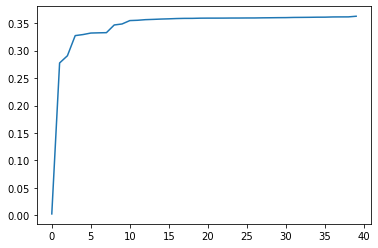

In [6]:
plt.plot([i[1]for i in sorted(L,key=lambda x:x[1])])